# Data preparation
- Data Cleansing
    + Errors from data entry
    + Physically impossible values
    + Missing values
    + Outliers
    + Spaces, typos
    + Errors against codebook
- Data Transforming
    + Aggregating data
    + Extrapolating data
    + Derived measures
    + Creating dummies
    + Reducing number of variables
- Data Integrating
    + Merging/join data sets
    + Set operators
    + Creating views

In [2]:
import pandas as pd
import glob
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
import math
import re
from collections import deque
plt.style.use('ggplot')

# Data Integrating

In [3]:
files_to_merge = ['https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/copper.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/crude_oil.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/DXY.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/EURUSD.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/MSCI.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/NASDAQ.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/NLR.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/platinum.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/RUT.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/silver.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/SP500.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/VIX.csv',
                  ]  
for file in files_to_merge:
    df = pd.read_csv(f'{file}')
    print(df.head(2))

         Date  copper
0  11/03/2023  3.6815
1  11/02/2023  3.6725
         Date  crude_oil
0  11/03/2023      80.51
1  11/02/2023      82.46
         Date     DXY
0  11/03/2023  105.02
1  11/02/2023  106.12
         Date  EURUSD
0  11/03/2023  1.0732
1  11/02/2023  1.0622
         Date    MSCI
0  11/03/2023  497.76
1  11/02/2023  487.02
         Date    NASDAQ
0  11/03/2023  13478.28
1  11/02/2023  13294.19
         Date    NLR
0  11/03/2023  71.36
1  11/02/2023  72.14
         Date  platinum
0  11/03/2023     944.3
1  11/02/2023     930.6
         Date      RUT
0  11/03/2023  1760.71
1  11/02/2023  1714.21
         Date  silver
0  11/03/2023  23.285
1  11/02/2023  22.846
         Date    SP500
0  11/03/2023  4358.34
1  11/02/2023  4317.78
         Date    VIX
0  11/03/2023  14.91
1  11/02/2023  15.66


In [4]:
import pandas as pd
import os

gold_df = pd.read_csv('https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_fed_and_gold/Gold.csv')  
files_to_merge = ['https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/copper.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/crude_oil.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/DXY.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/EURUSD.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/MSCI.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/NASDAQ.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/NLR.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/platinum.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/RUT.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/silver.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/SP500.csv',
                  'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/crawl_13_features/VIX.csv',
                  ]  

gold_df['Date'] = pd.to_datetime(gold_df['Date'], format='%m/%d/%Y')


merged_data = gold_df

for file in files_to_merge:
    df = pd.read_csv(f'{file}')
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    merged_data = pd.merge(merged_data, df, on='Date', how='left')
merged_data .rename(columns = {'open': 'GOLD_open',
                              'high': 'GOLD_high',
                              'close': 'GOLD_close',
                              'low': 'GOLD_low',
                              'Date': 'Date'} ,inplace=True)

In [5]:
merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
2,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
3,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
4,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
3519,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
3520,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3521,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02


In [6]:
merged_data.columns

Index(['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
       'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum',
       'RUT', 'silver', 'SP500', 'VIX'],
      dtype='object')

In [7]:
rows, cols = merged_data.shape
print("There are {} rows.".format(rows))
print("There are {} columns.".format(cols))

There are 3523 rows.
There are 17 columns.


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3523 non-null   datetime64[ns]
 1   GOLD_open   3523 non-null   float64       
 2   GOLD_high   3523 non-null   float64       
 3   GOLD_low    3523 non-null   float64       
 4   GOLD_close  3523 non-null   float64       
 5   copper      3523 non-null   float64       
 6   crude_oil   3503 non-null   float64       
 7   DXY         3523 non-null   float64       
 8   EURUSD      3523 non-null   float64       
 9   MSCI        3504 non-null   float64       
 10  NASDAQ      3523 non-null   float64       
 11  NLR         3422 non-null   float64       
 12  platinum    3522 non-null   float64       
 13  RUT         3506 non-null   float64       
 14  silver      3506 non-null   float64       
 15  SP500       3523 non-null   float64       
 16  VIX         3505 non-nul

In [9]:
dd = merged_data.drop(['Date'], axis = 1)

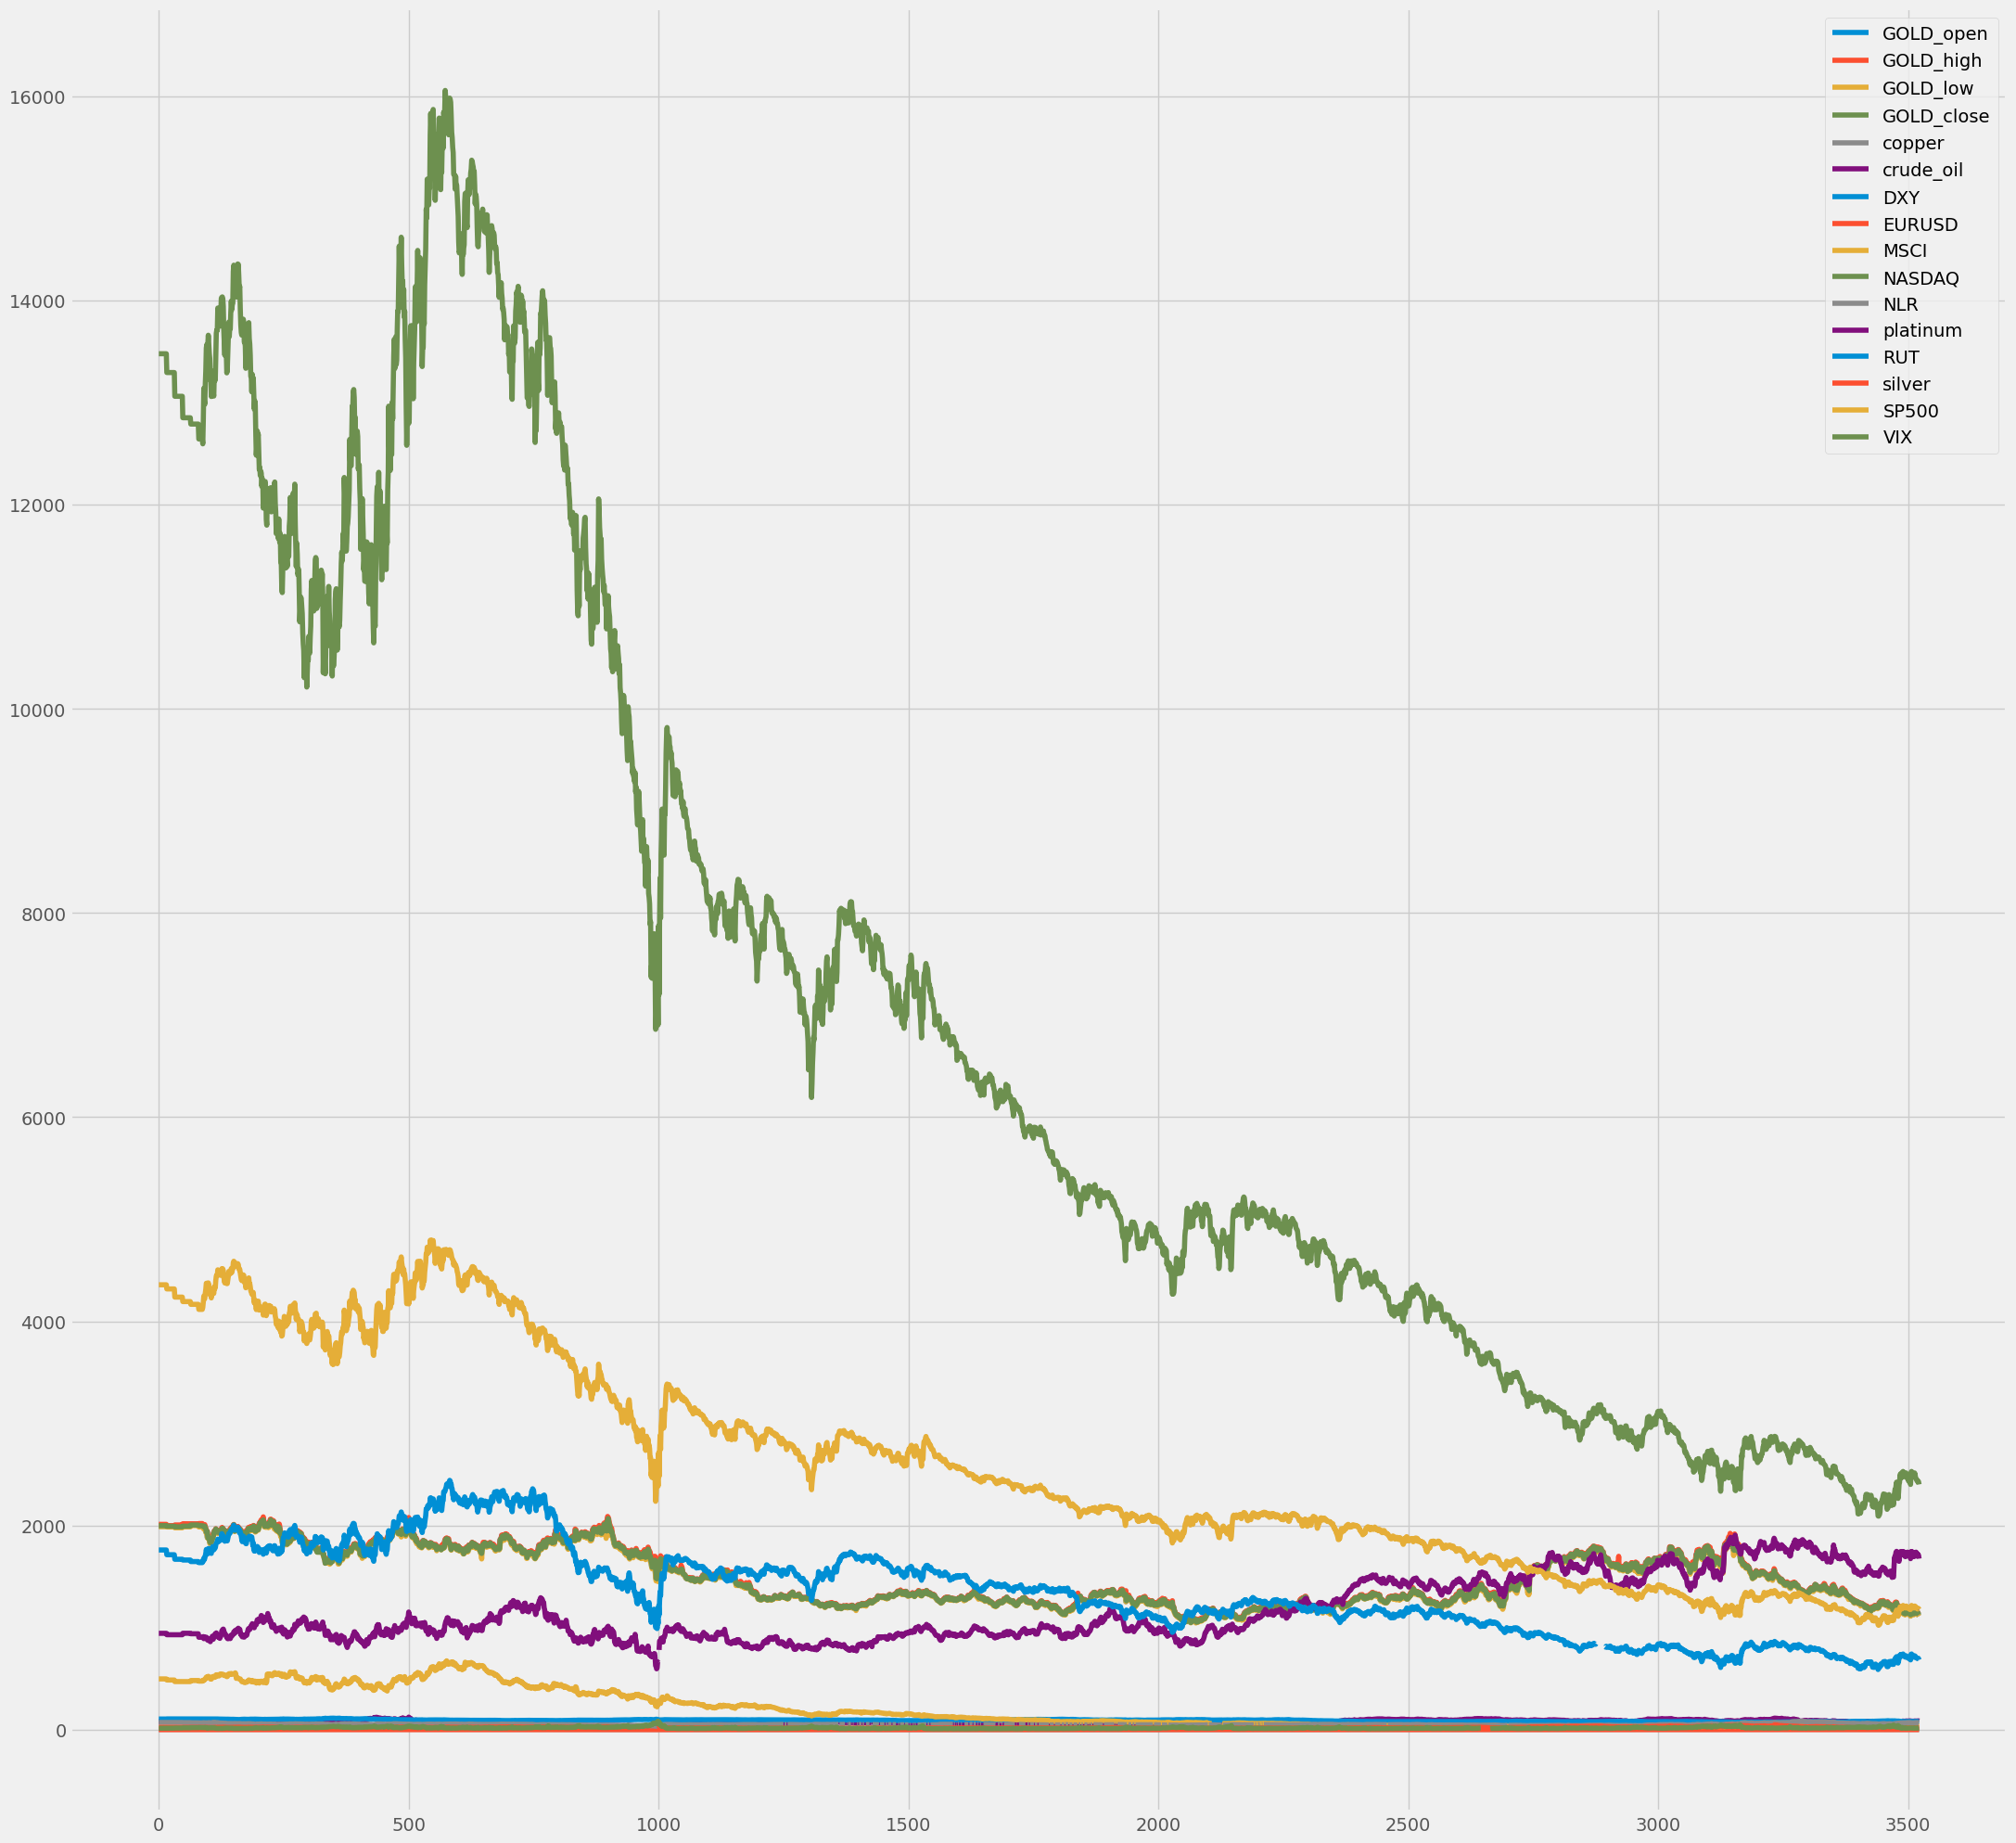

In [11]:
plt.rcParams['figure.figsize'] = [24, 24] #resize the plot
plt.style.use('fivethirtyeight')
#plt.figure(figsize = (12, 8))

dd.plot()
plt.show()

In [12]:
dd.describe().drop(['25%', '50%', '75%']).transpose()

,count,mean,std,min,max
GOLD_open,3523.0,1498.371615,275.879422,1051.5000,2076.4000
GOLD_high,3523.0,1508.886233,278.063719,1062.7000,2089.2000
GOLD_low,3523.0,1487.146636,273.265368,1045.4000,2049.0000
GOLD_close,3523.0,1498.115754,275.540407,1049.6000,2069.4000
copper,3523.0,3.258305,0.665505,1.9435,4.9375
crude_oil,3503.0,71.877868,22.033436,11.5700,123.7000
DXY,3523.0,91.705280,9.203110,72.9300,114.1000
EURUSD,3523.0,1.193561,0.113284,0.9596,1.4831
MSCI,3504.0,196.093884,189.453843,25.5900,675.1500
NASDAQ,3523.0,7062.869659,3957.994311,2091.7900,16057.4400


In [13]:
#To check for duplicates
dd.duplicated().sum()

99

<Axes: >

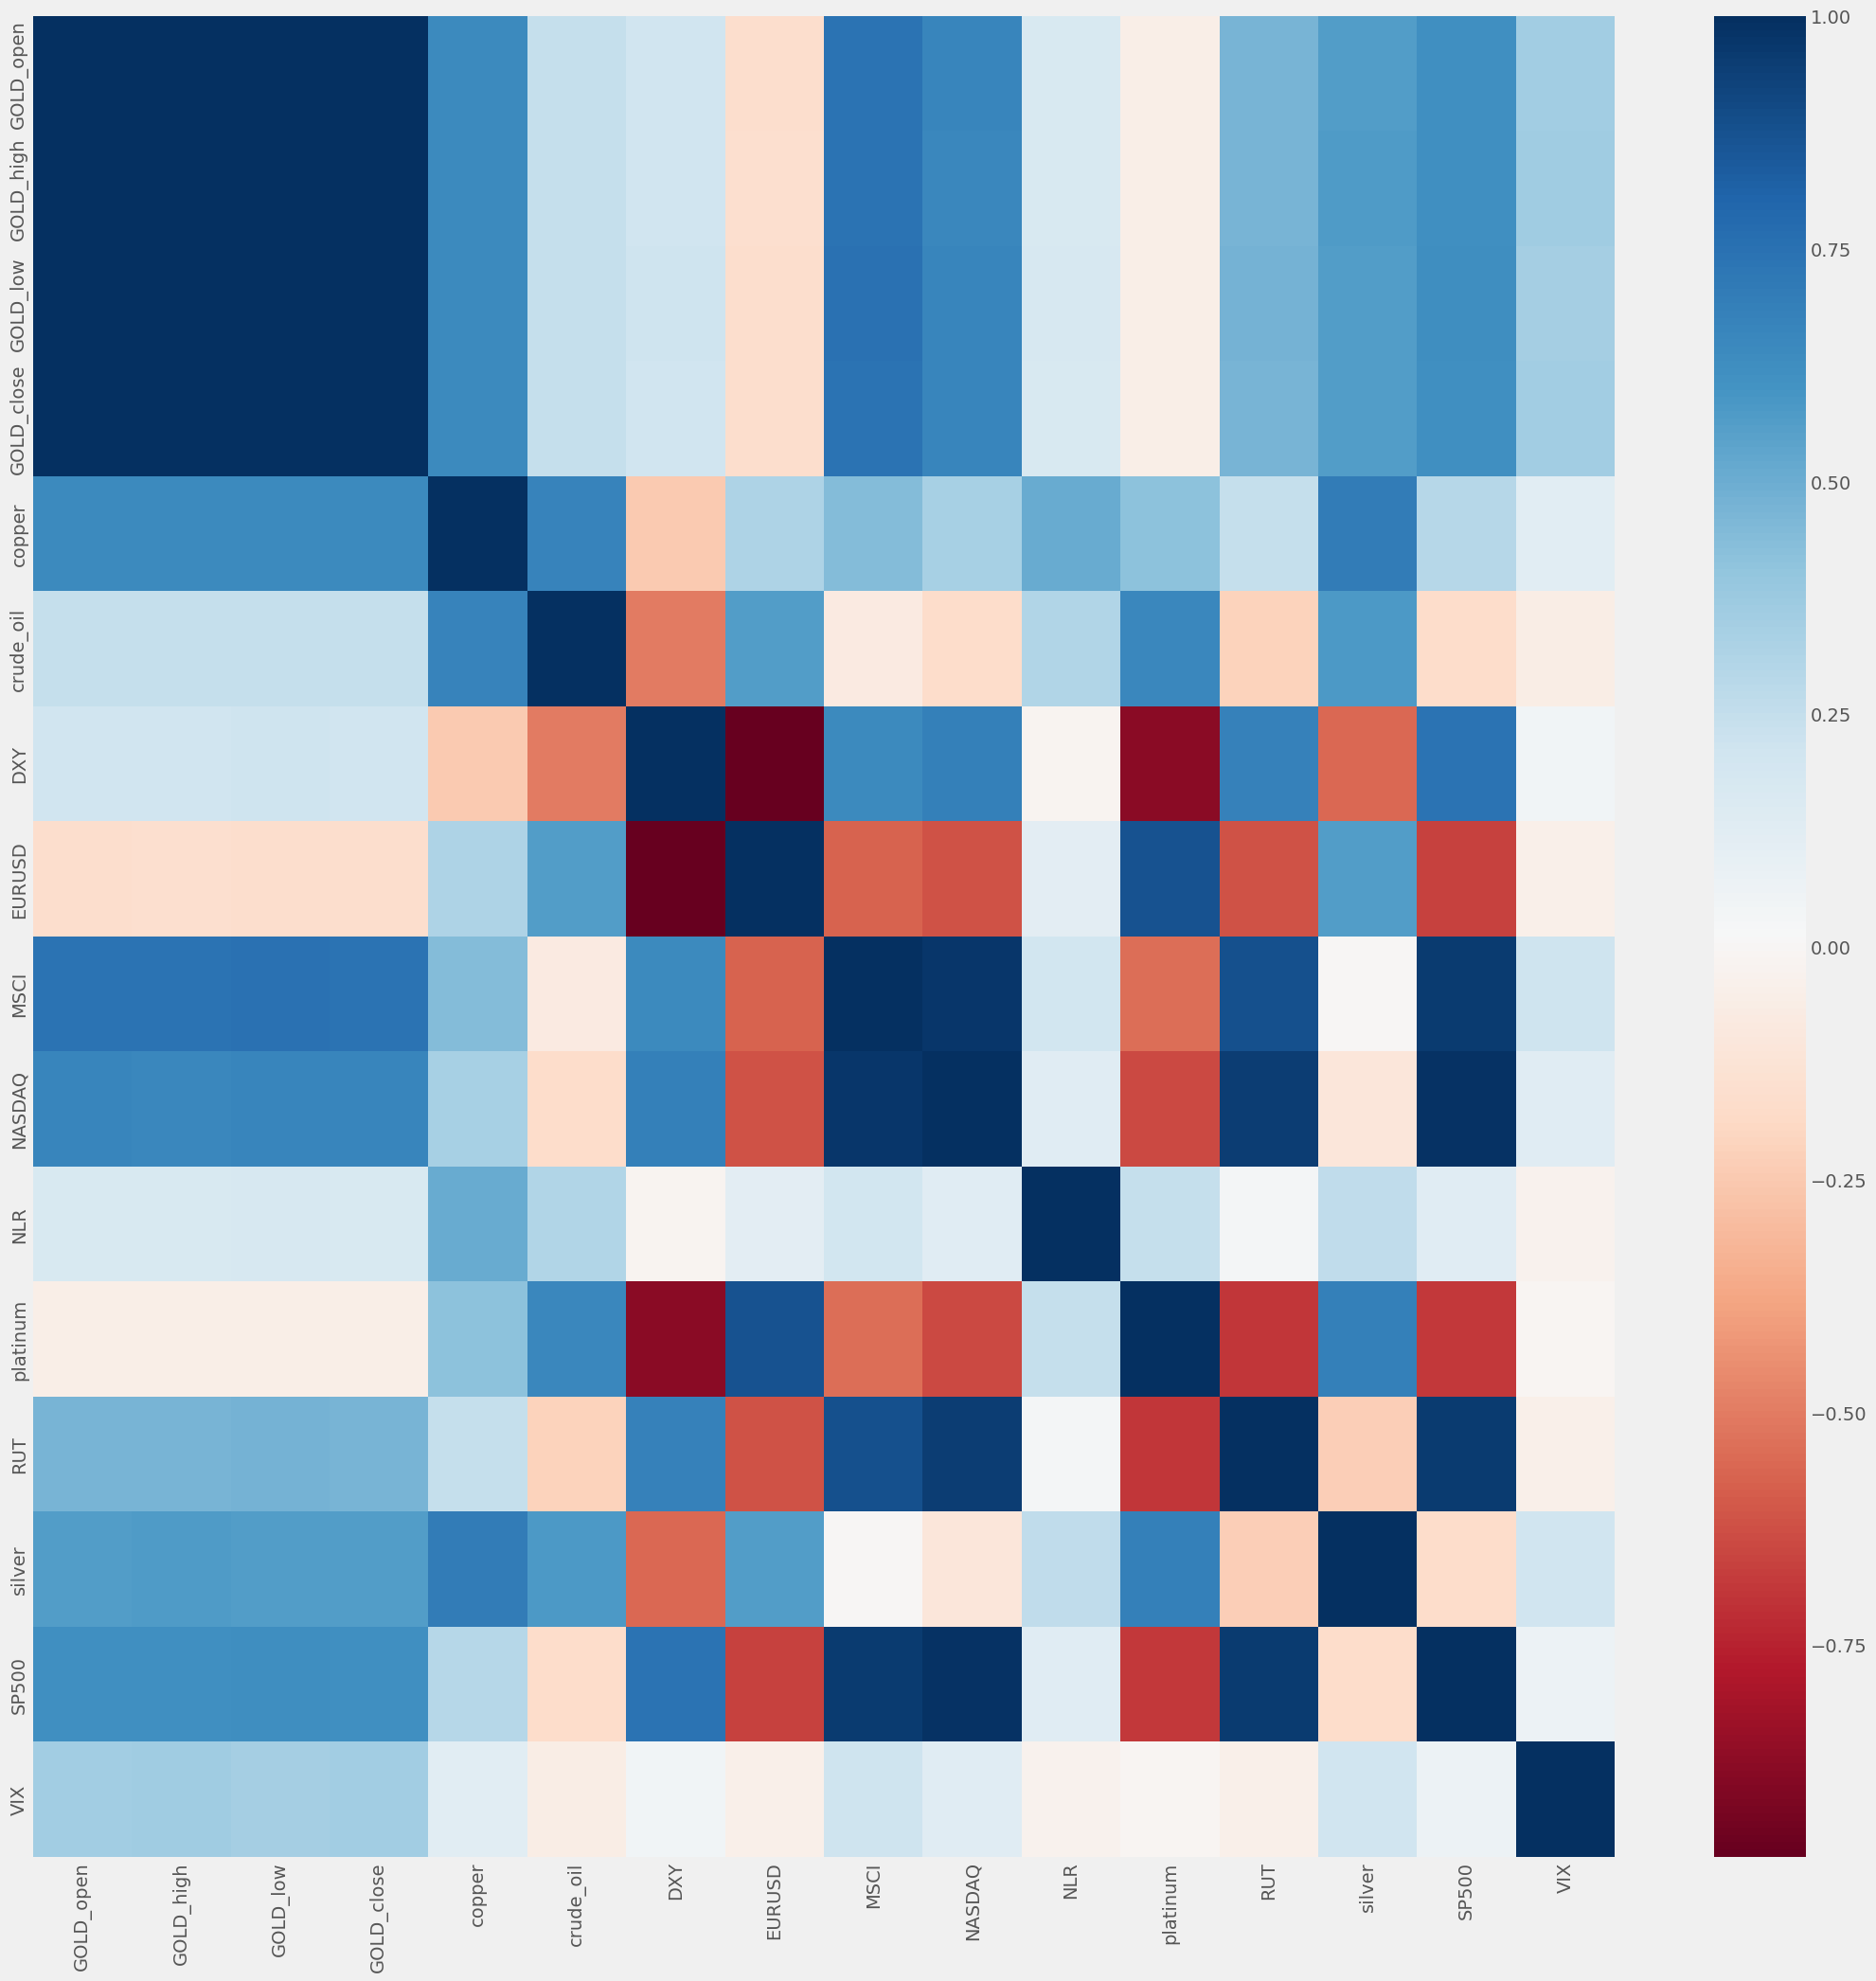

In [14]:
sns.heatmap(dd.corr(), cmap="RdBu")

# Data cleansing

## 1. Evaluating Target Variables

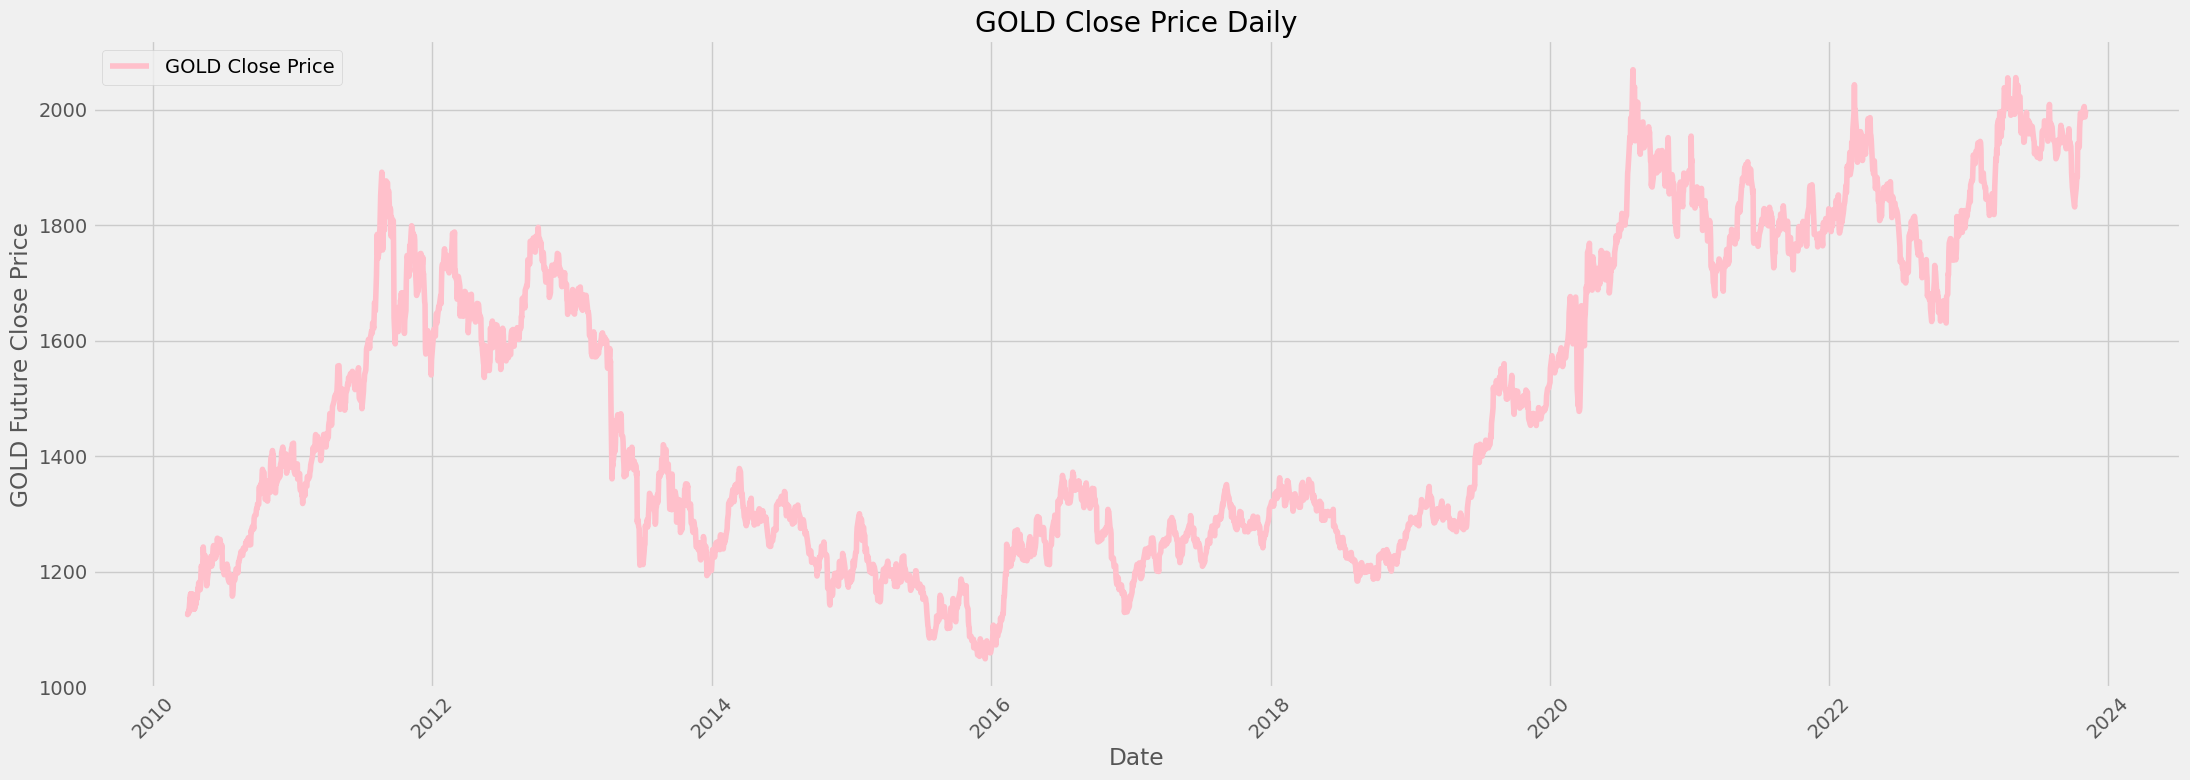

In [15]:
import matplotlib.pyplot as plt

# Assuming merged_data['Date'] is in datetime format
fig, ax = plt.subplots(figsize=(24, 8))
plt.style.use('fivethirtyeight')

ax.plot(merged_data['Date'], merged_data['GOLD_close'], color='pink', label='GOLD Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('GOLD Future Close Price')
ax.set_title('GOLD Close Price Daily')
ax.grid(True)
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.show()


In [16]:
merged_data['GOLD_close'].describe()

count    3523.000000
mean     1498.115754
std       275.540407
min      1049.600000
25%      1258.300000
50%      1396.200000
75%      1754.200000
max      2069.400000
Name: GOLD_close, dtype: float64

In [17]:
print("Number of records with NULL price: ", merged_data['GOLD_close'].isna().sum())

Number of records with NULL price:  0


### Before clipping the values of the target variables

Skewness:  0.36758721825874735


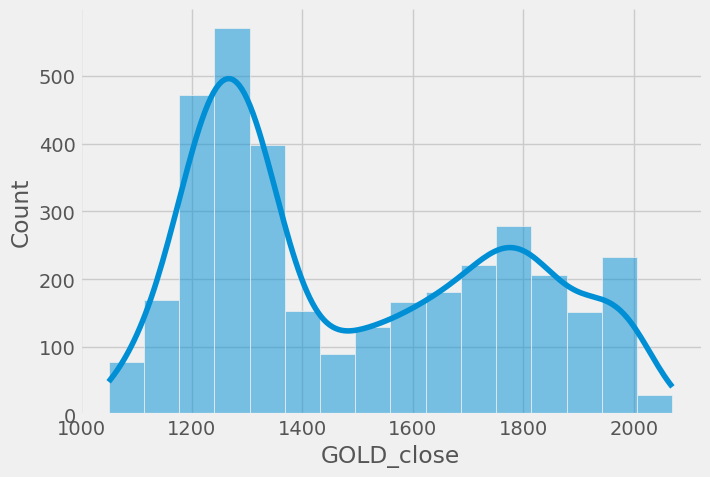

In [18]:
plt.style.use('fivethirtyeight')
price_dist = sns.displot(merged_data['GOLD_close'], kde=True)
price_dist.fig.set_size_inches(8,5)
print("Skewness: ", merged_data['GOLD_close'].skew())

### Visualization
Checking the distribution of the Gold Price about outliers:


In [21]:
columns_to_plot = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
                   'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum',
                   'RUT', 'silver', 'SP500', 'VIX']

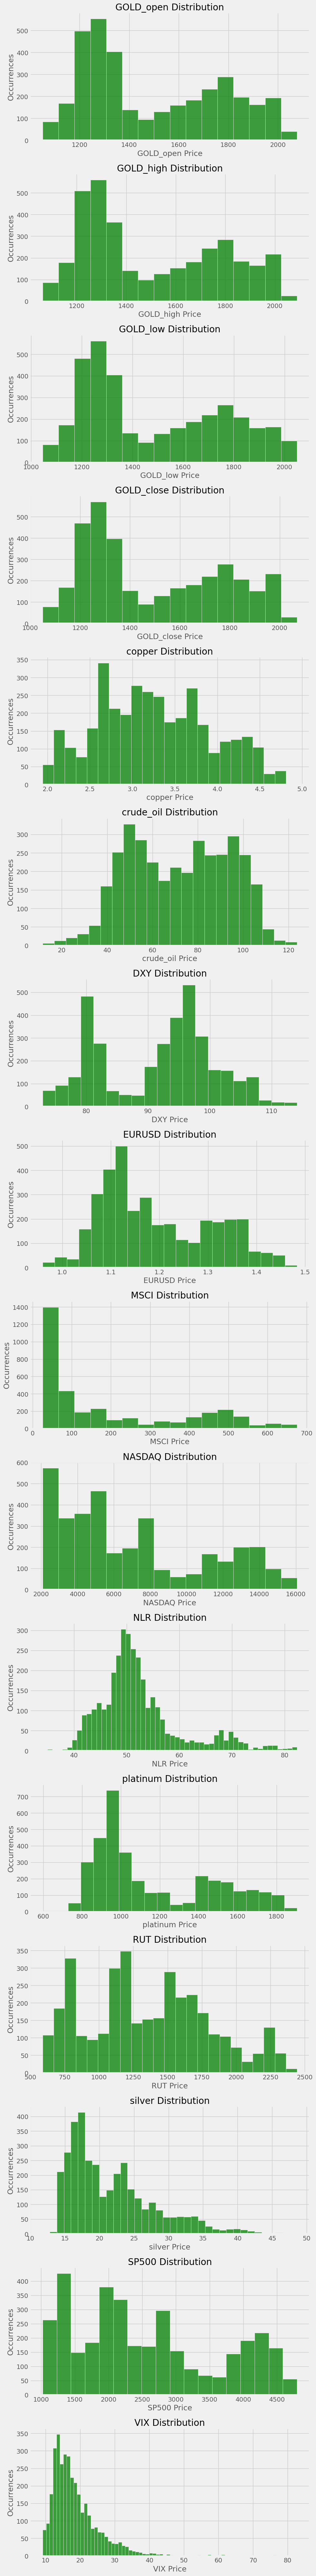

In [22]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5*len(columns_to_plot)))
plt.style.use('fivethirtyeight')
# Iterate through columns and plot
for i, column in enumerate(columns_to_plot):
    sns.histplot(dd[column], color='green', ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(f'{column} Price')
    axes[i].set_ylabel('Occurrences')

# Adjust layout
plt.tight_layout()
plt.show()

## 2. Handling NULL Values

### NULL values

In [23]:
null_count_arr = merged_data.isna().sum().sort_values(ascending=False)
null_count_arr

NLR           101
crude_oil      20
MSCI           19
VIX            18
silver         17
RUT            17
platinum        1
SP500           0
NASDAQ          0
Date            0
GOLD_open       0
DXY             0
copper          0
GOLD_close      0
GOLD_low        0
GOLD_high       0
EURUSD          0
dtype: int64

Text(0, 0.5, 'Missing Values (%)')

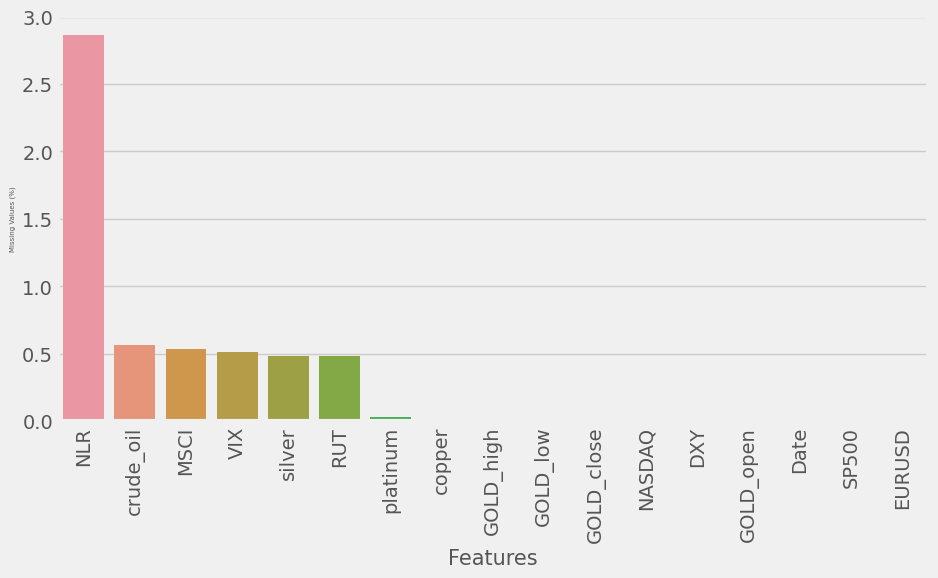

In [24]:
# plot the distribution of missing values by 24 features 
null_ratio = (null_count_arr.sort_values(ascending=False)[:24]/df.shape[0])*100
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
sns.barplot(x = null_ratio.index, y = null_ratio)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Missing Values (%)', fontsize = 5)

By observing the above information, we realize there is one problem with NULL data.
- Weekly Features and Some GOLD Features:
    + Issue: Some GOLD features lose data on Saturday and Sunday, and some weekly features only lose data on Saturday and Friday. Other features mostly lose data on Saturday and Sunday.

    + Solution: For missing data, set the value equal to the value of the previous date.

    + Implementation:

        - Identify the columns with missing values related to the second problem.
        - Use the fillna method to fill missing values with the previous value in the column. 


In [25]:
import pandas as pd
null_data = merged_data.copy()
null_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

null_values_by_day = null_data.groupby('DayOfWeek').apply(lambda x: x.isnull().sum())

# In kết quả
print("Số giá trị null theo ngày:")
print(null_values_by_day)


Số giá trị null theo ngày:
           Date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper   
DayOfWeek                                                             
Friday        0          0          0         0           0       0  \
Monday        0          0          0         0           0       0   
Thursday      0          0          0         0           0       0   
Tuesday       0          0          0         0           0       0   
Wednesday     0          0          0         0           0       0   

           crude_oil  DXY  EURUSD  MSCI  NASDAQ  NLR  platinum  RUT  silver   
DayOfWeek                                                                     
Friday             5    0       0     4       0   23         1    3       3  \
Monday             3    0       0     3       0   15         0    3       4   
Thursday           4    0       0     4       0   27         0    3       4   
Tuesday            4    0       0     4       0   18         0    4       3   
W

### First Problem (FED with Monthly Frequency)
### Second Problem (Weekly Features and Some GOLD Features)

In [26]:
merged_data.sort_values(by='Date', ascending=True, inplace=True)
merged_data.reset_index(inplace=True, drop=True)

merged_data.fillna(method='ffill', inplace=True)

merged_data.sort_values(by='Date', ascending=False, inplace=True)
merged_data.reset_index(inplace=True, drop=True)
merged_data.fillna(method='ffill', inplace=True)

merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
2,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
3,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
4,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3519,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
3520,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
3521,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47


In [27]:
# Verify the changes
null_count_arr_after_fill = merged_data.isna().sum().sort_values(ascending=False)
print(null_count_arr_after_fill)

Date          0
MSCI          0
SP500         0
silver        0
RUT           0
platinum      0
NLR           0
NASDAQ        0
EURUSD        0
GOLD_open     0
DXY           0
crude_oil     0
copper        0
GOLD_close    0
GOLD_low      0
GOLD_high     0
VIX           0
dtype: int64


### Distribution of Columns

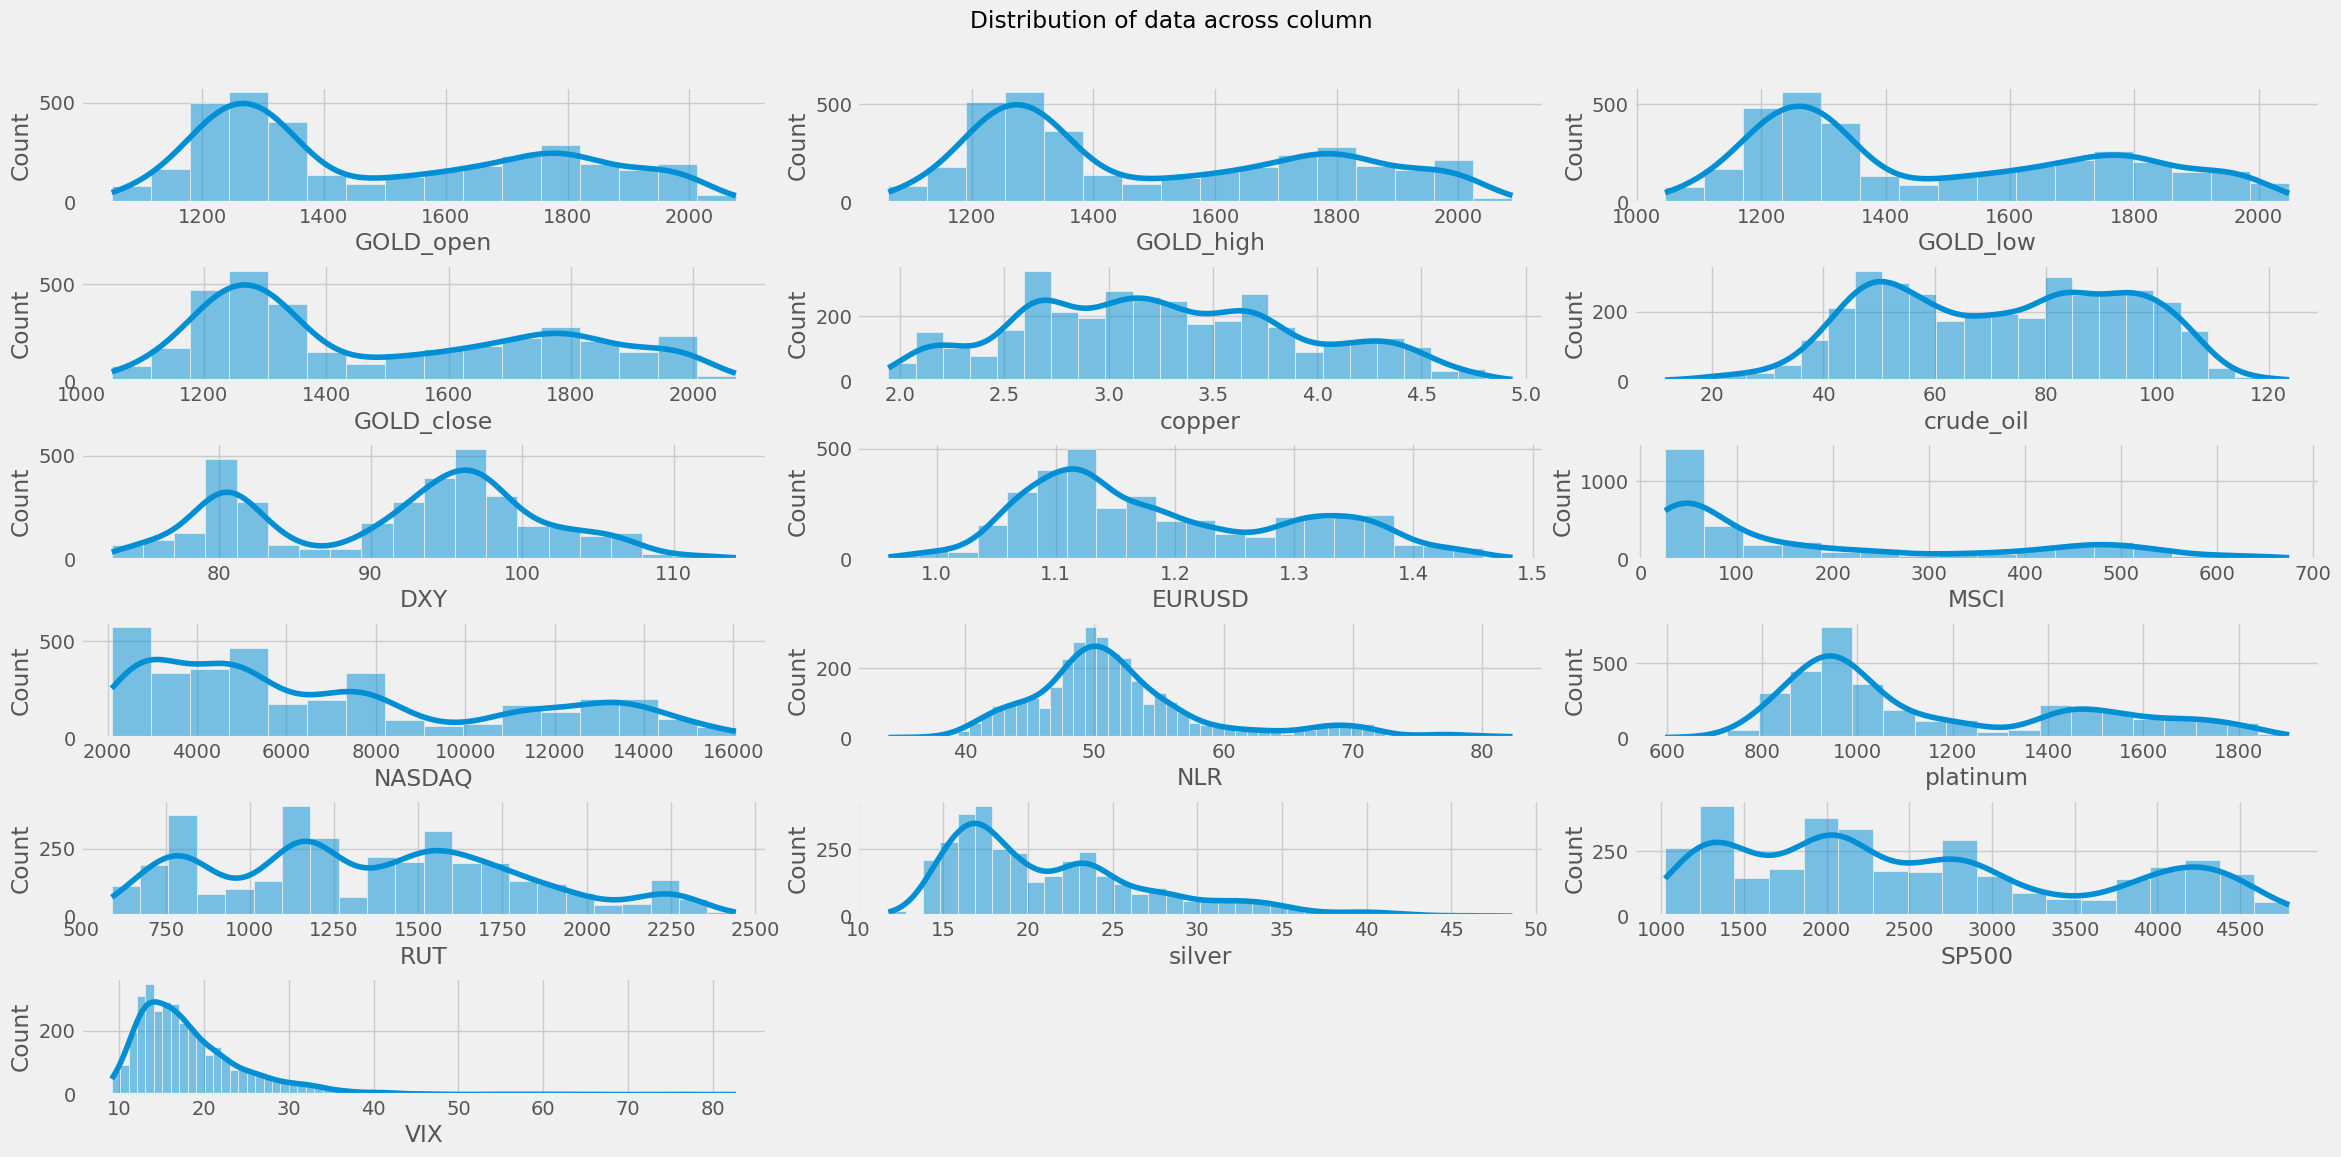

In [28]:
fig = plt.figure(figsize=(24, 12)) 
plt.style.use('fivethirtyeight')
fig.suptitle('Distribution of data across column')
temp = merged_data.drop("Date", axis=1).columns.tolist()

cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=merged_data, x=item, kde=True)

plt.tight_layout(pad=2.0, w_pad=0.1, h_pad=0.5)  
plt.show()

## 3. Correlation Analysis

<Axes: >

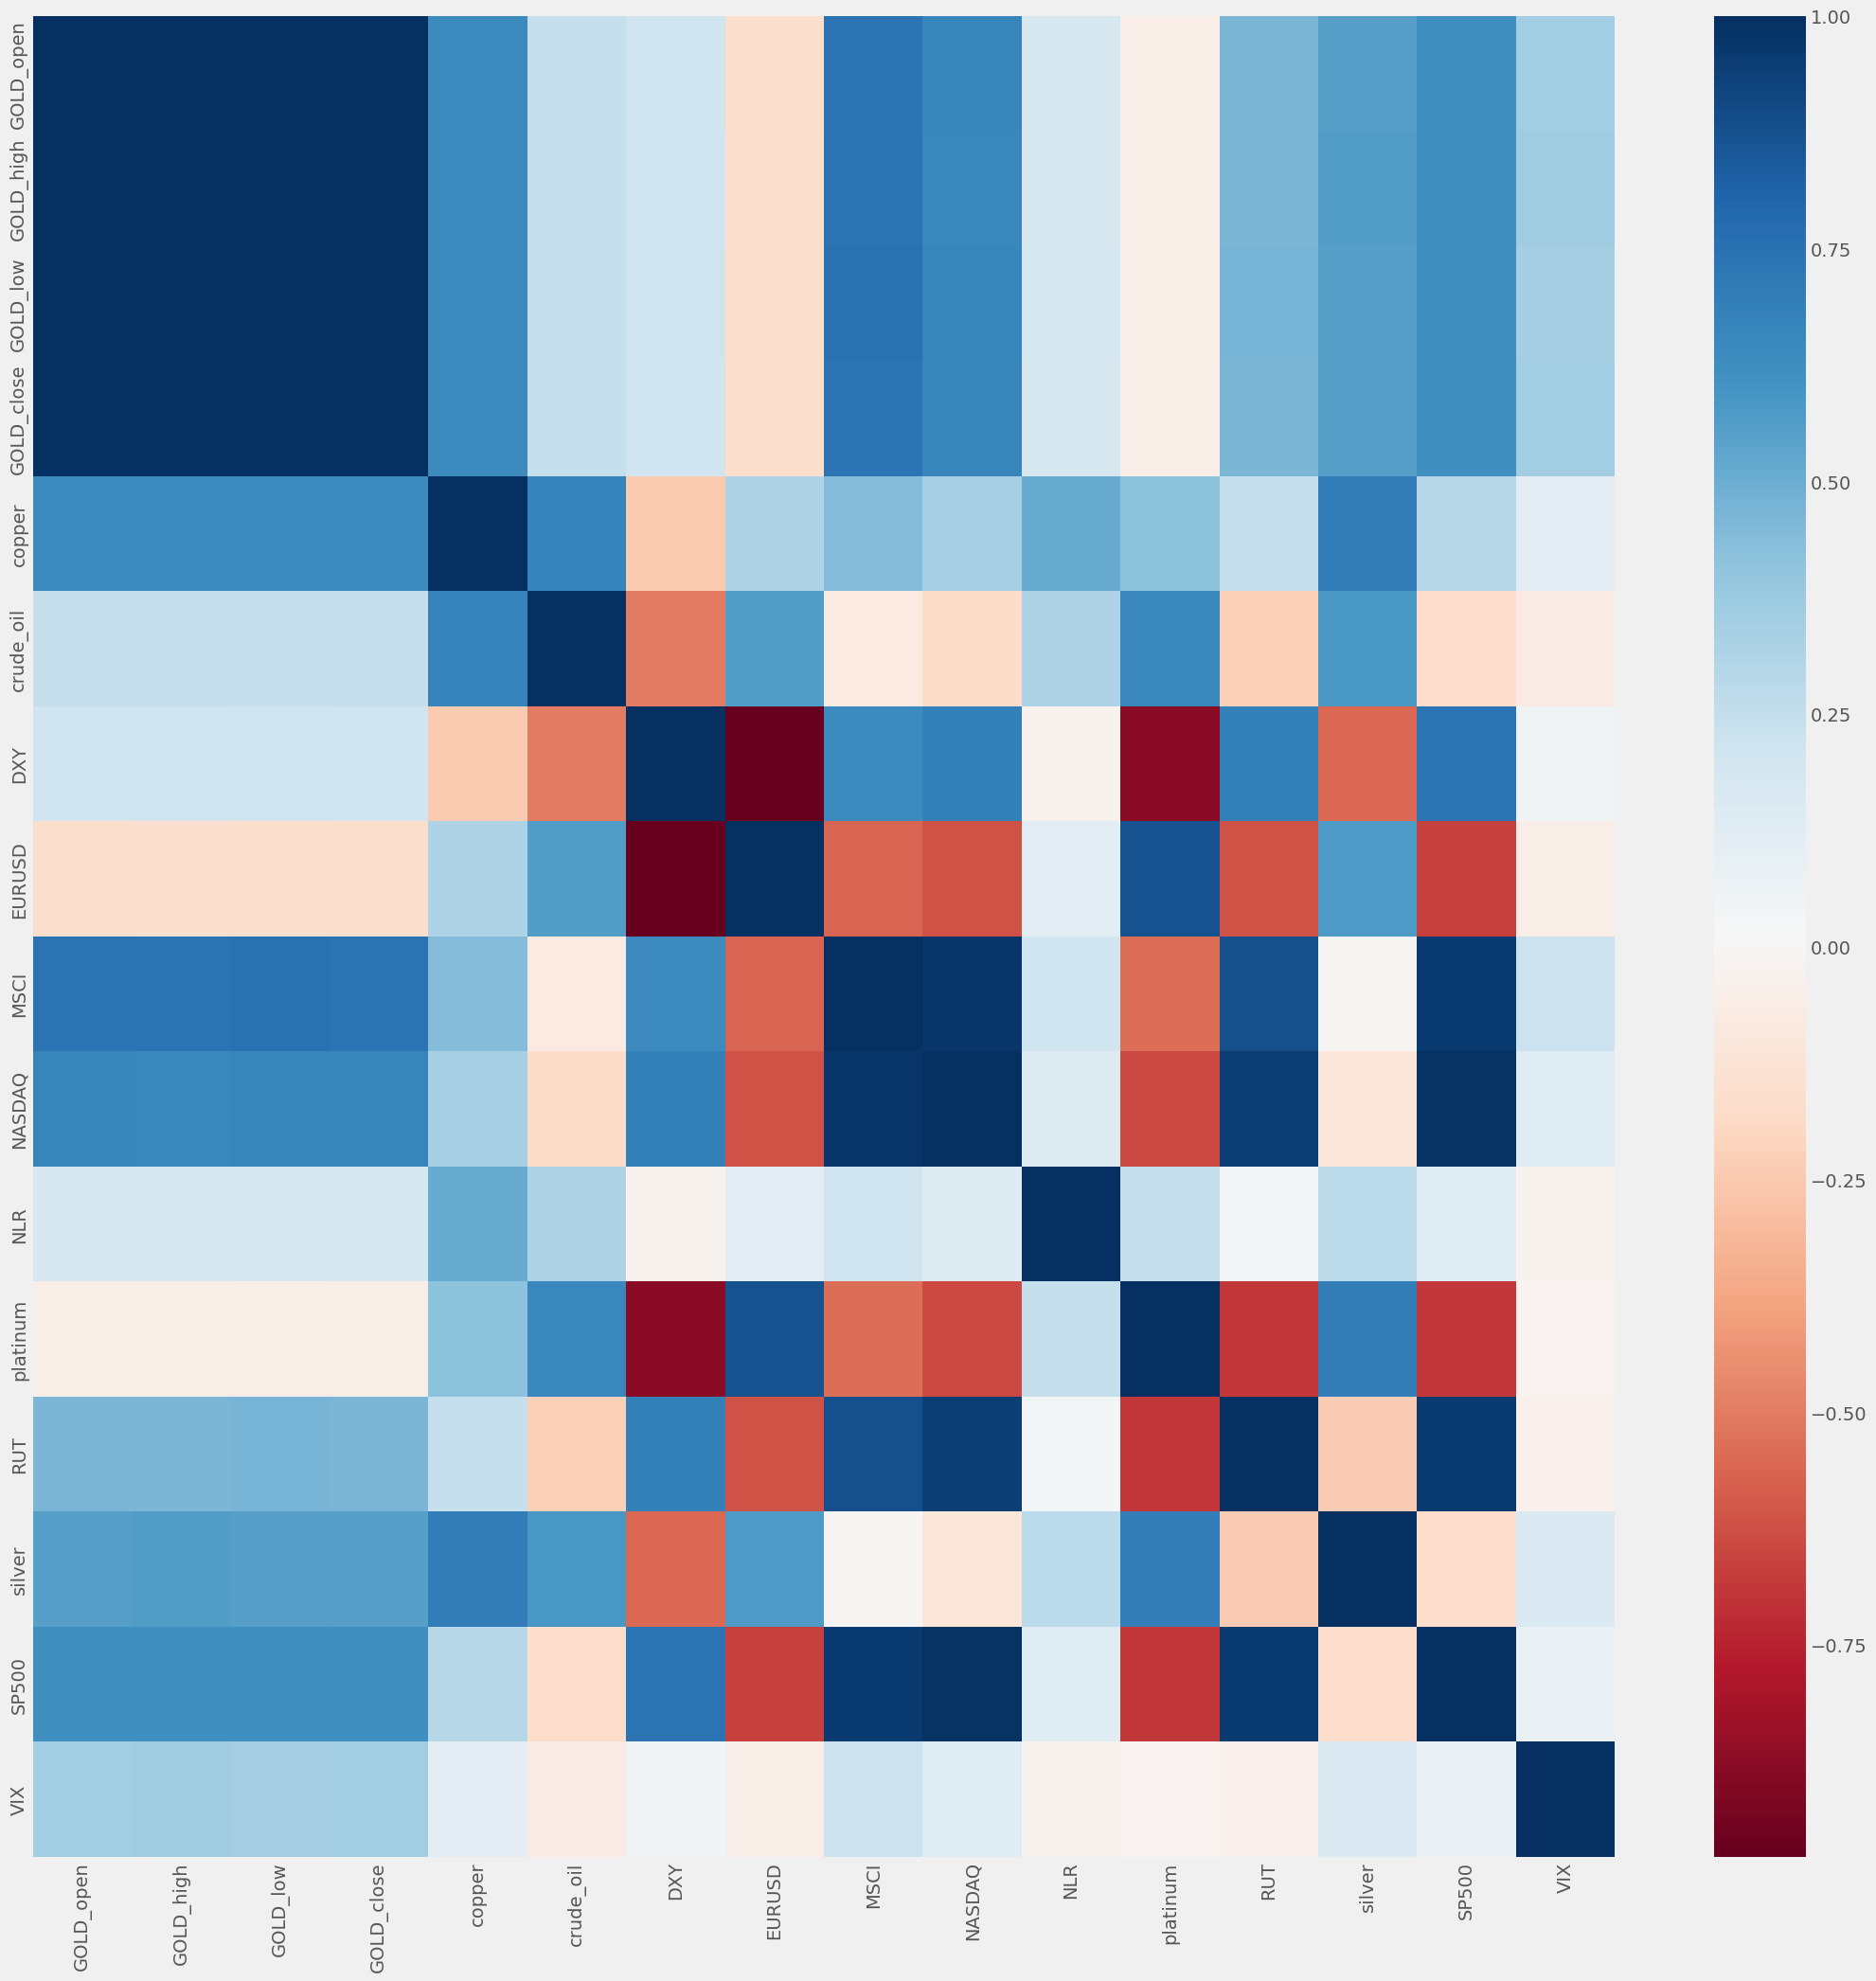

In [29]:
ds = merged_data.set_index('Date') 
plt.style.use('fivethirtyeight')
sns.heatmap(ds.corr(), cmap="RdBu")

In [30]:
# Retrieve the number of categorical fields and numerical fields
# field indices where column is categorical
categorical_col_idx = np.where(ds.dtypes == object)[0]
# field indices where column is numerical
numerical_col_idx = np.where(ds.dtypes != object)[0]
print("Number of categorical fields: ", categorical_col_idx.shape[0])
print("Number of numerical fields: ", numerical_col_idx.shape[0])

Number of categorical fields:  0
Number of numerical fields:  16


### Handling Outliers 

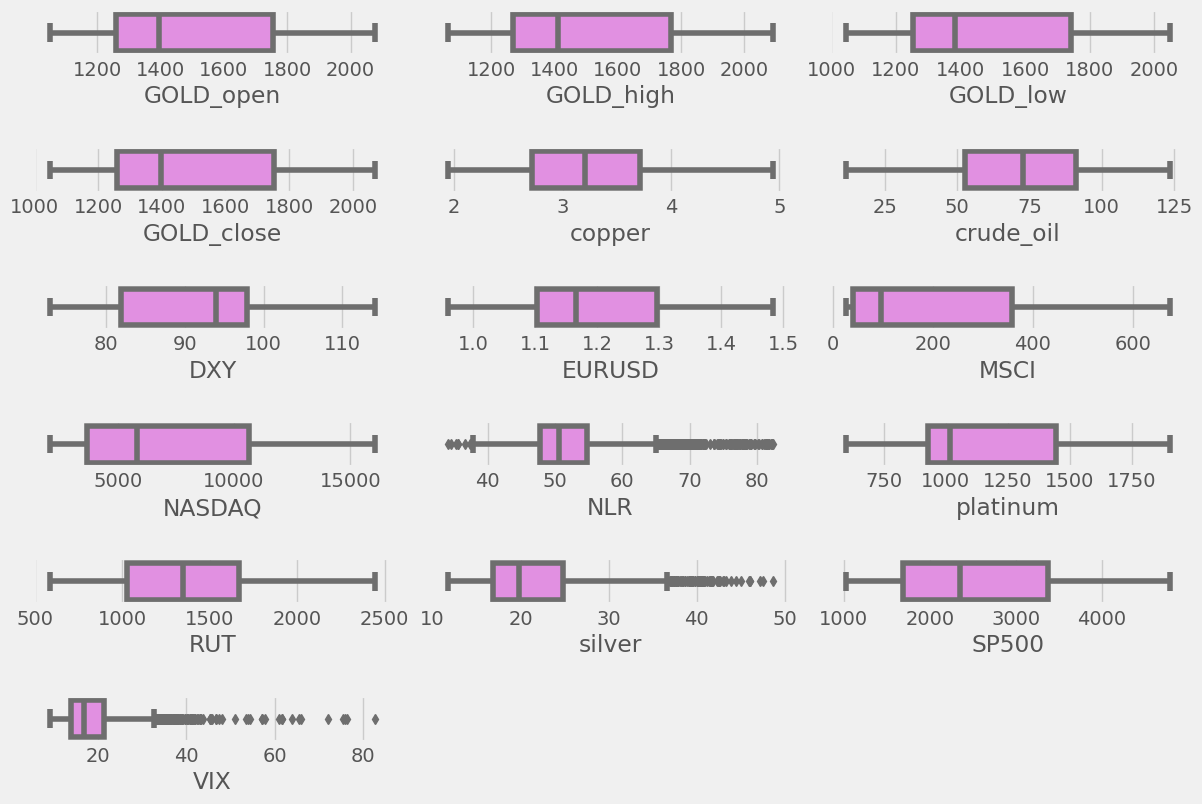

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
temp = merged_data.drop("Date", axis=1).columns.tolist()
cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=merged_data, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

# Data Transforming

## 5. Feature Engineering

### Preparing X and y to do train test split

In [32]:
# select the features and target variable
from sklearn.model_selection import train_test_split

X = merged_data.drop(['Date', 'GOLD_close'], axis=1)
 
y = merged_data['GOLD_close']
# dividing dataset in to train test
x_train, x_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

## 6. Feature Selection

Using the "Extra Trees Regressor" tool of the Scikitlearn library to create a graph that visually shows the importance of the independent variables X to the dependent variable Y in the forecasting model

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

feat_selection = ExtraTreesRegressor()
feat_selection.fit(X,y)

ExtraTreesRegressor()

In [34]:
print(feat_selection.feature_importances_)

[2.92880256e-01 2.92143599e-01 3.24176800e-01 5.78540253e-03
 5.08398007e-05 1.21836462e-04 3.83804944e-05 5.33005936e-02
 1.48253011e-02 3.07275497e-04 3.56854853e-04 6.43950904e-04
 7.14690726e-03 7.94164683e-03 2.80355049e-04]


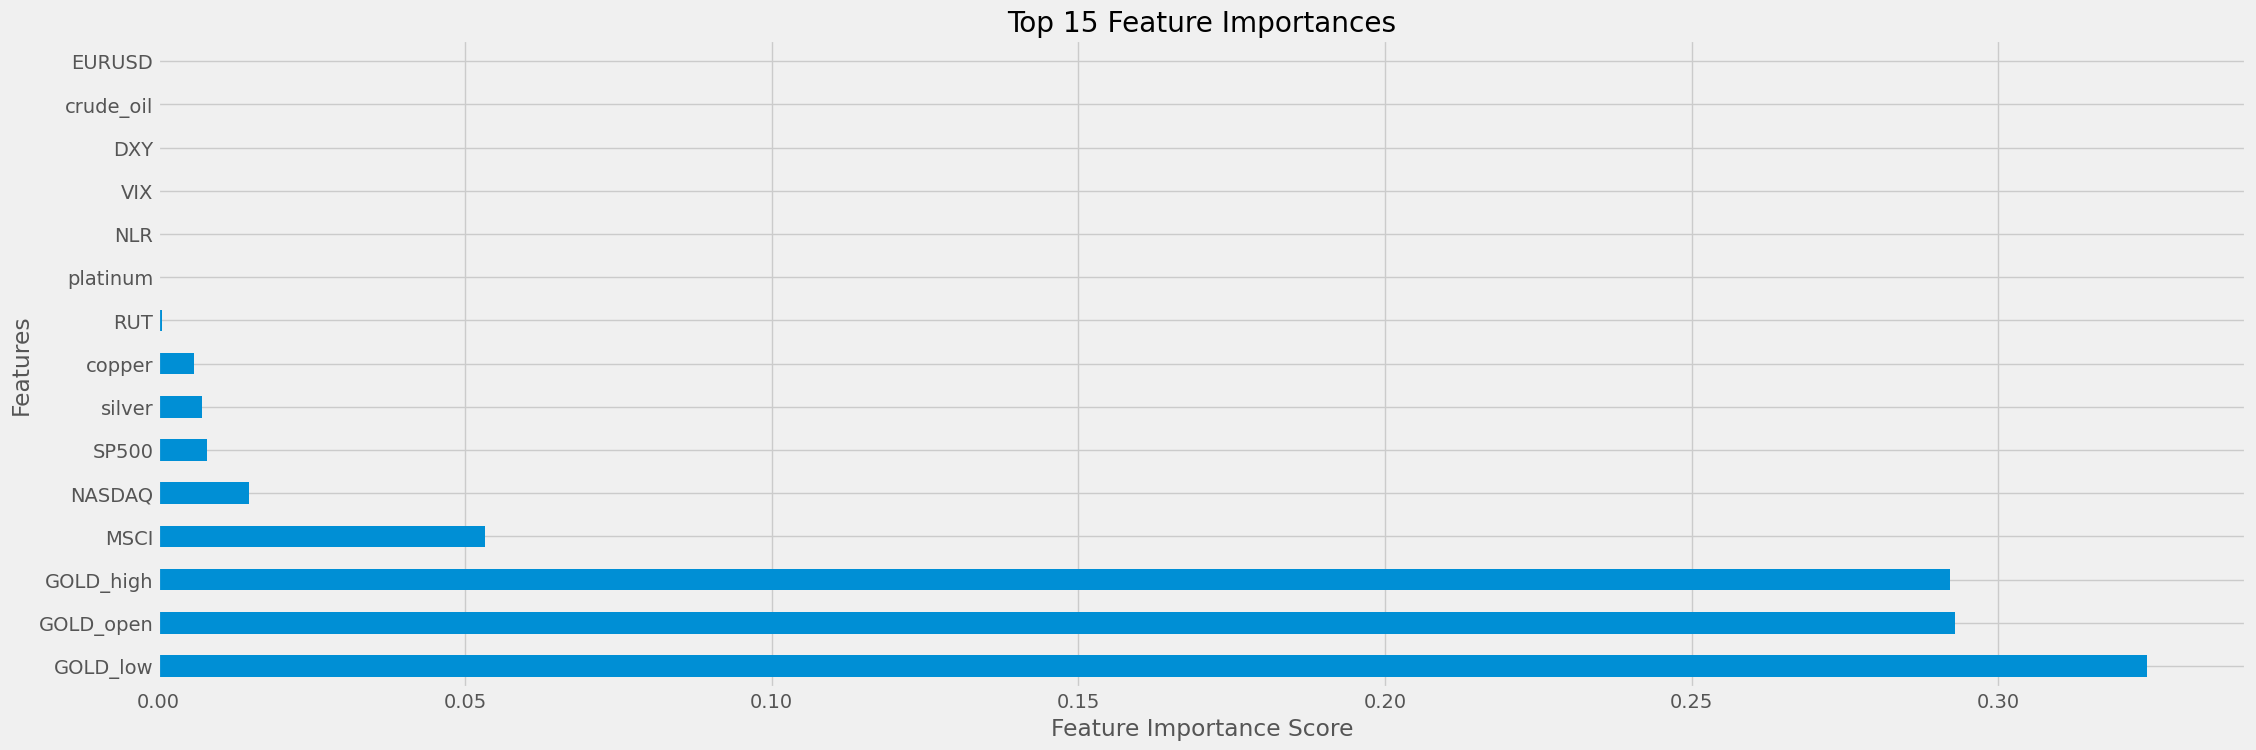

In [35]:
feat_importances = pd.Series(feat_selection.feature_importances_, index=X.columns)

# Set the figure size
plt.figure(figsize=(24, 8)) 
plt.style.use('fivethirtyeight')
# Plot the horizontal bar chart
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')
plt.show()

In [36]:
merged_data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
2,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
3,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
4,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3519,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
3520,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
3521,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47


# Finishing Touch

In [37]:

# Specify a different directory with write permissions
#output_directory = os.path.expanduser("merged_data")
#os.makedirs(output_directory, exist_ok=True)

# Create 'data_preparation.csv' file
#output_file_path = os.path.join(output_directory, 'data_preparation.csv')
merged_data.to_csv('data_preparation.csv', index=False)

print(f'The merged data is saved to: data_preparation.csv')

The merged data is saved to: data_preparation.csv
